In [36]:
library(ggplot2)
library(ggstatsplot)
library(tidyverse)
library(ggpubr)
library(rstatix)
library(PMCMRplus)
library(reshape2)
library(lme4)
library(lmerTest)
library(effectsize)

In [2]:
df <- read.csv("./Data/Pilot-Study/merged.csv")

In [3]:
df <- melt(df, id.vars=c("PID", "Color", "Speed"), measure.vars="rel_PupilDilation")

In [4]:
head(df)

,PID,Color,Speed,variable,value
,<int>,<chr>,<int>,<fct>,<dbl>
1,0,B,0,rel_PupilDilation,-0.92597849
2,0,G,0,rel_PupilDilation,0.20927672
3,0,W,0,rel_PupilDilation,0.08245132
4,0,B,200,rel_PupilDilation,-0.82087443
5,0,G,200,rel_PupilDilation,0.33629442
6,0,W,200,rel_PupilDilation,0.15588913


,PID,Color,Speed,variable,value
,<int>,<chr>,<int>,<fct>,<dbl>
1,0,B,0,rel_PupilDilation,-0.9259785
2,0,B,200,rel_PupilDilation,-0.8208744
3,0,B,350,rel_PupilDilation,-0.8819980
4,0,B,500,rel_PupilDilation,-1.4313556
5,1,B,0,rel_PupilDilation,-0.5826612
6,1,B,200,rel_PupilDilation,-0.3608967



	Shapiro-Wilk normality test

data:  df_black$value
W = 0.99139, p-value = 0.9972


,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Speed,0.06804741,0.06804741,1,20,1.400614,0.2504974


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: value ~ Speed + (1 | PID)
   Data: df_black

REML criterion at convergence: 23.1

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.42576 -0.44876  0.00238  0.51642  1.84868 

Random effects:
 Groups   Name        Variance Std.Dev.
 PID      (Intercept) 0.06173  0.2485  
 Residual             0.04858  0.2204  
Number of obs: 28, groups:  PID, 7

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept) -0.7499598  0.1185255 10.2918841  -6.327 7.57e-05 ***
Speed        0.0002665  0.0002252 20.0000000   1.183     0.25    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
      (Intr)
Speed -0.499

Parameter,Eta2_partial,CI,CI_low,CI_high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Speed,0.06544739,0.95,0,1


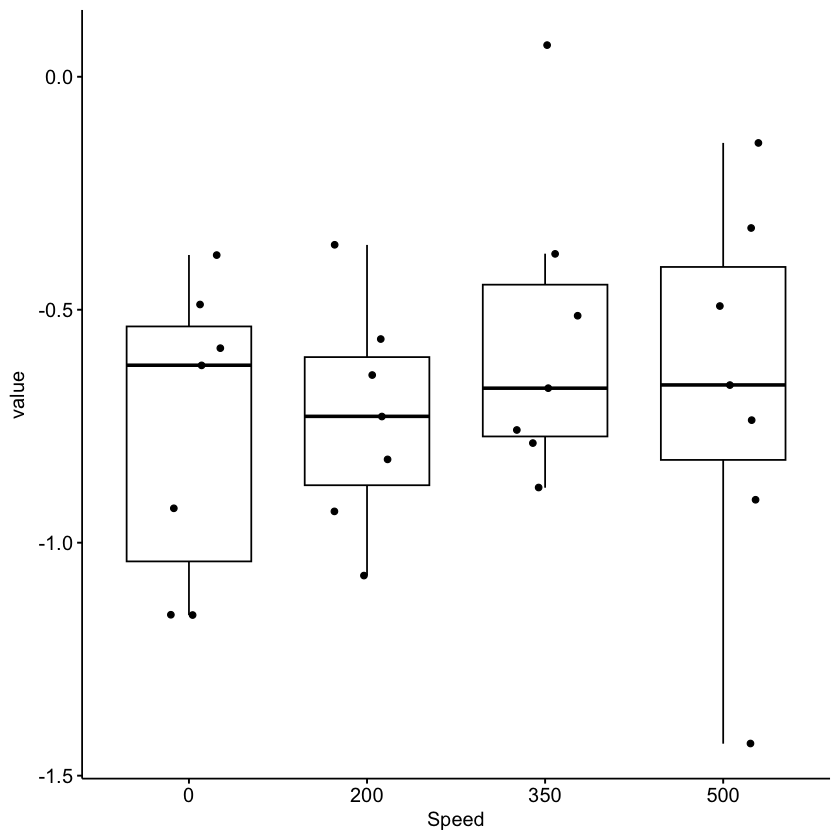

In [5]:
df_black <- df %>% filter(Color == "B")
head(df_black)

shapiro.test(df_black$value)

ggboxplot(df_black, x = "Speed", y = "value", add = "jitter")

lmer_result <- lmer(value ~ Speed + (1|PID), data=df_black)
anova(lmer_result)
summary(lmer_result)
effectsize_result <- eta_squared(lmer_result, partial = TRUE)
effectsize_result

,PID,Color,Speed,variable,value
,<int>,<chr>,<int>,<fct>,<dbl>
1,0,G,0,rel_PupilDilation,0.2092767
2,0,G,200,rel_PupilDilation,0.3362944
3,0,G,350,rel_PupilDilation,0.3602680
4,0,G,500,rel_PupilDilation,0.3104468
5,1,G,0,rel_PupilDilation,-0.1885850
6,1,G,200,rel_PupilDilation,-0.1530431



	Shapiro-Wilk normality test

data:  df_gray$value
W = 0.96588, p-value = 0.4756


,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Speed,0.1904455,0.1904455,1,20,15.41375,0.0008363126


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: value ~ Speed + (1 | PID)
   Data: df_gray

REML criterion at convergence: -8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.5342 -0.7903  0.1710  0.5988  1.6221 

Random effects:
 Groups   Name        Variance Std.Dev.
 PID      (Intercept) 0.03647  0.1910  
 Residual             0.01236  0.1112  
Number of obs: 28, groups:  PID, 7

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept) 1.242e-01  8.087e-02 7.976e+00   1.535 0.163357    
Speed       4.458e-04  1.136e-04 2.000e+01   3.926 0.000836 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
      (Intr)
Speed -0.369


	Pairwise comparisons using paired t tests 

data:  df_gray$value and df_gray$Speed 

    0    200  350 
200 0.39 -    -   
350 0.84 1.00 -   
500 0.16 0.40 0.36

P value adjustment method: bonferroni 

Parameter,Eta2_partial,CI,CI_low,CI_high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Speed,0.4352477,0.95,0.1601174,1


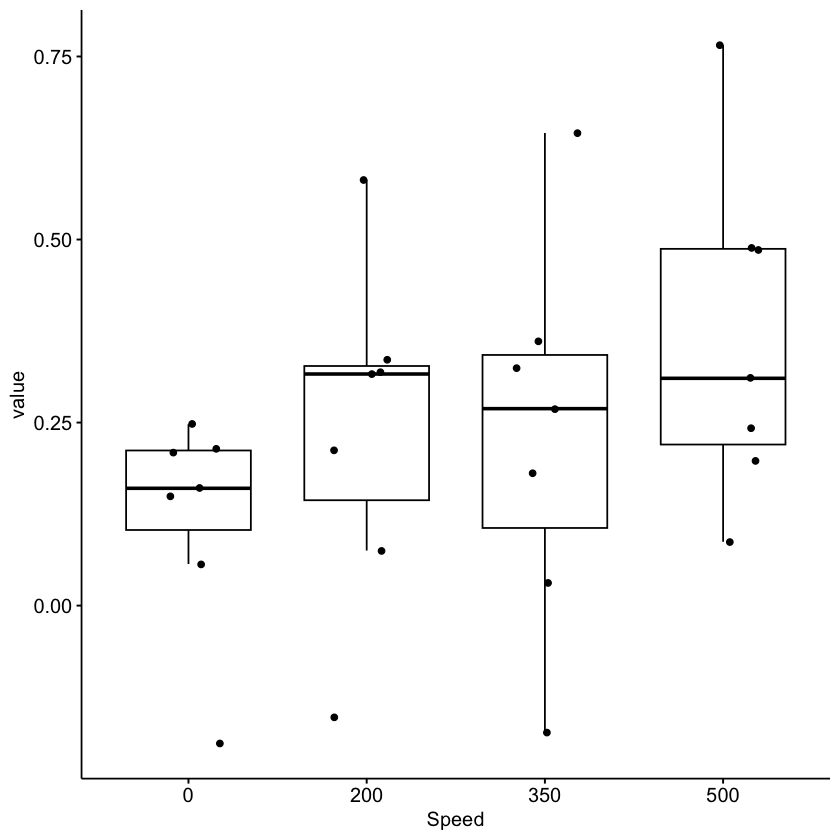

In [6]:
df_gray <- df %>% filter(Color == "G")
head(df_gray)

shapiro.test(df_gray$value)

ggboxplot(df_gray, x = "Speed", y = "value", add = "jitter")

lmer_result <- lmer(value ~ Speed + (1|PID), data=df_gray)
anova(lmer_result)
summary(lmer_result)

pairwise_result <- pairwise.t.test(df_gray$value, df_gray$Speed, paired=TRUE, p.adjust.method="bonferroni")
pairwise_result
effectsize_result <- eta_squared(lmer_result, partial = TRUE)
effectsize_result

,PID,Color,Speed,variable,value
,<int>,<chr>,<int>,<fct>,<dbl>
1,0,W,0,rel_PupilDilation,0.08245132
2,0,W,200,rel_PupilDilation,0.15588913
3,0,W,350,rel_PupilDilation,0.08087040
4,0,W,500,rel_PupilDilation,0.07186815
5,1,W,0,rel_PupilDilation,-0.14571664
6,1,W,200,rel_PupilDilation,-0.09585802



	Shapiro-Wilk normality test

data:  df_white$value
W = 0.95322, p-value = 0.2385


,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Speed,0.01438912,0.01438912,1,20,4.92122,0.03826567


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: value ~ Speed + (1 | PID)
   Data: df_white

REML criterion at convergence: -46.6

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.99318 -0.49243  0.07097  0.29967  1.62369 

Random effects:
 Groups   Name        Variance Std.Dev.
 PID      (Intercept) 0.007130 0.08444 
 Residual             0.002924 0.05407 
Number of obs: 28, groups:  PID, 7

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)  
(Intercept) -1.383e-02  3.651e-02  8.369e+00  -0.379   0.7143  
Speed        1.225e-04  5.524e-05  2.000e+01   2.218   0.0383 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
      (Intr)
Speed -0.397


	Pairwise comparisons using paired t tests 

data:  df_white$value and df_white$Speed 

    0    200  350 
200 1.00 -    -   
350 1.00 1.00 -   
500 0.21 1.00 1.00

P value adjustment method: bonferroni 

Parameter,Eta2_partial,CI,CI_low,CI_high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Speed,0.1974711,0.95,0.006634851,1


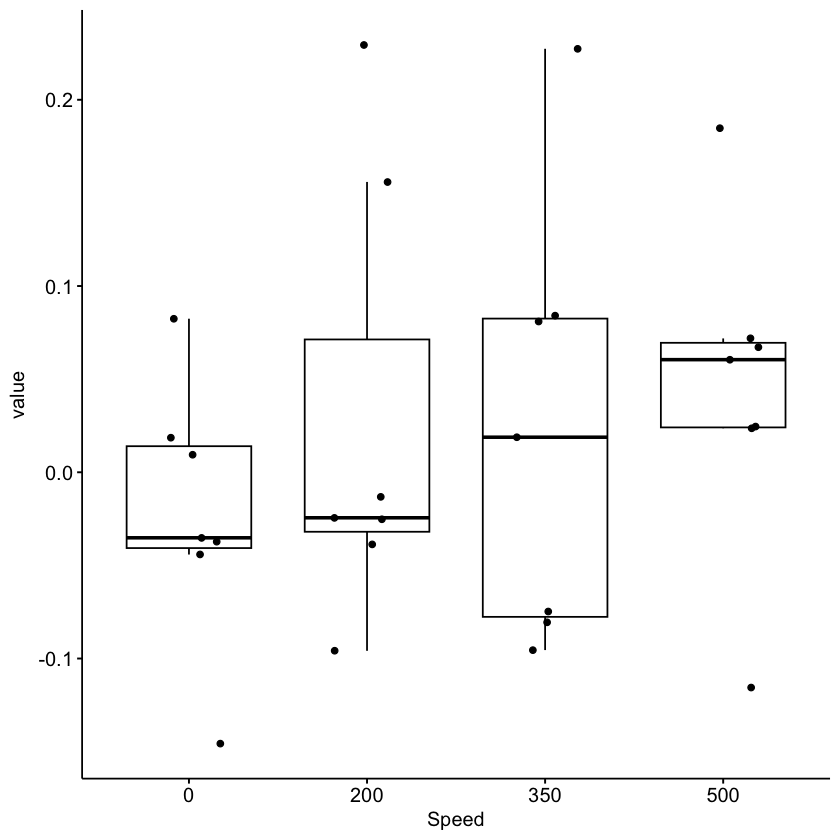

In [7]:
df_white <- df %>% filter(Color == "W")
head(df_white)

shapiro.test(df_white$value)

ggboxplot(df_white, x = "Speed", y = "value", add = "jitter")

lmer_result <- lmer(value ~ Speed + (1|PID), data=df_white)
anova(lmer_result)
summary(lmer_result)

pairwise_result <- pairwise.t.test(df_white$value, df_white$Speed, paired=TRUE, p.adjust.method="bonferroni")
pairwise_result
effectsize_result <- eta_squared(lmer_result, partial = TRUE)
effectsize_result

In [16]:
df <- read.csv("/Users/kosch/Workspace/rsvp-pupil-dilation/Data/Main-Study_1/merged_main.csv", sep = ",")

In [17]:
df %>%
  group_by(Speed) %>%
  get_summary_stats("rel_PupilDilation", type = "common")

Speed,variable,n,min,max,median,iqr,mean,sd,se,ci
<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,rel_PupilDilation,19,-0.598,0.720,0.110,0.320,0.115,0.296,0.068,0.143
200,rel_PupilDilation,19,-0.416,0.419,0.055,0.421,0.066,0.253,0.058,0.122
250,rel_PupilDilation,19,-0.717,0.663,0.042,0.254,0.046,0.290,0.066,0.140
300,rel_PupilDilation,19,-0.285,0.542,0.113,0.349,0.130,0.245,0.056,0.118
350,rel_PupilDilation,19,-0.196,0.459,0.155,0.298,0.127,0.198,0.046,0.096
400,rel_PupilDilation,19,-0.361,0.480,0.205,0.272,0.165,0.223,0.051,0.108
450,rel_PupilDilation,19,-0.528,0.476,0.217,0.307,0.133,0.279,0.064,0.134
500,rel_PupilDilation,19,-0.235,0.388,0.131,0.229,0.131,0.177,0.041,0.085
550,rel_PupilDilation,19,-0.269,0.687,0.223,0.414,0.169,0.254,0.058,0.123


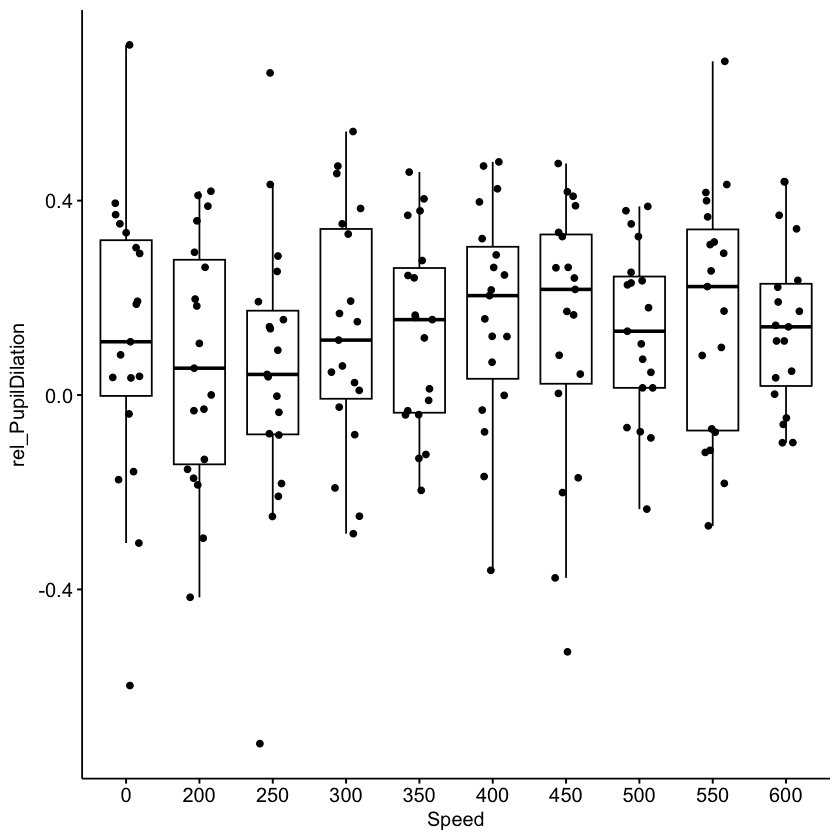

In [18]:
ggboxplot(df, x = "Speed", y = "rel_PupilDilation", add = "jitter")

In [19]:
res.fried <- df %>% friedman_test(rel_PupilDilation ~ Speed |PID)
res.fried

,.y.,n,statistic,df,p,method
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>
Friedman chi-squared,rel_PupilDilation,19,10.23445,9,0.3318408,Friedman test


In [20]:
df %>% friedman_effsize(rel_PupilDilation ~ Speed |PID)

,.y.,n,effsize,method,magnitude
,<chr>,<int>,<dbl>,<chr>,<ord>
Friedman chi-squared,rel_PupilDilation,19,0.05985058,Kendall W,small


In [37]:
df <- read.csv("Data/main-tlx-melted.csv", sep = ";")
head(df)

,id,pid,variable,value
,<int>,<int>,<chr>,<int>
1,0,1,nRS,55
2,1,2,nRS,18
3,2,3,nRS,37
4,3,4,nRS,26
5,4,5,nRS,7
6,5,6,nRS,7


In [38]:
res.fried <- df %>% friedman_test(value ~ variable |pid)
res.fried

,.y.,n,statistic,df,p,method
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>
Friedman chi-squared,value,19,100.2332,9,1.411596e-17,Friedman test


In [39]:
df %>% friedman_effsize(value ~ variable |pid)

,.y.,n,effsize,method,magnitude
,<chr>,<int>,<dbl>,<chr>,<ord>
Friedman chi-squared,value,19,0.5861588,Kendall W,large


In [40]:
pairwise_result <- pairwise.wilcox.test(df$value, df$variable, 
                                        p.adjust.method = "bonferroni", 
                                        paired = TRUE, 
                                        exact = FALSE)
pairwise_result


	Pairwise comparisons using Wilcoxon signed rank test with continuity correction 

data:  df$value and df$variable 

    200    250    300    350    400    450    500    550    600   
250 1.0000 -      -      -      -      -      -      -      -     
300 1.0000 1.0000 -      -      -      -      -      -      -     
350 1.0000 1.0000 1.0000 -      -      -      -      -      -     
400 0.1690 0.2463 0.1218 0.4181 -      -      -      -      -     
450 0.1586 0.0934 0.0815 0.1068 1.0000 -      -      -      -     
500 0.0096 0.0075 0.0096 0.0178 1.0000 1.0000 -      -      -     
550 0.0064 0.0082 0.0064 0.0142 0.4003 0.0576 0.1580 -      -     
600 0.0089 0.0075 0.0064 0.0076 0.0814 0.0708 0.4494 1.0000 -     
nRS 1.0000 1.0000 1.0000 0.6326 0.0300 0.0305 0.0064 0.0104 0.0122

P value adjustment method: bonferroni 

In [46]:
effsize <- wilcox_effsize(df, value ~ variable, comparisons = list(c("600", "350"), c("550", "350"), c("550", "300"), c("550", "250"), c("550", "200"), c("500", "300"), c("500", "250"), c("500", "200"), c("450", "200"), c("nRS", "600"), c("nRS", "550"), c("nRS", "500"), c("nRS", "450"), c("nRS", "400")))
print(effsize)

# A tibble: 14 × 7
   .y.   group1 group2 effsize    n1    n2 magnitude
 * <chr> <chr>  <chr>    <dbl> <int> <int> <ord>    
 1 value 350    600      0.571    19    19 large    
 2 value 350    550      0.538    19    19 large    
 3 value 300    550      0.602    19    19 large    
 4 value 250    550      0.583    19    19 large    
 5 value 200    550      0.638    19    19 large    
 6 value 300    500      0.462    19    19 moderate 
 7 value 250    500      0.450    19    19 moderate 
 8 value 200    500      0.524    19    19 large    
 9 value 200    450      0.469    19    19 moderate 
10 value 600    nRS      0.711    19    19 large    
11 value 550    nRS      0.744    19    19 large    
12 value 500    nRS      0.657    19    19 large    
13 value 450    nRS      0.588    19    19 large    
14 value 400    nRS      0.502    19    19 large    


In [19]:
df <- read.csv("Data/main-questionnaire-melted.csv", sep = ";")
res.fried <- df %>% friedman_test(value ~ condition |pid)
res.fried

,.y.,n,statistic,df,p,method
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>
Friedman chi-squared,value,19,17.77918,9,0.03782355,Friedman test


In [20]:
df %>% friedman_effsize(value ~ condition |pid)

,.y.,n,effsize,method,magnitude
,<chr>,<int>,<dbl>,<chr>,<ord>
Friedman chi-squared,value,19,0.1039718,Kendall W,small


In [24]:
pairwise_result <- pairwise.wilcox.test(df$value, df$condition, 
                                        p.adjust.method = "bonferroni", 
                                        paired = TRUE, 
                                        exact = FALSE)
pairwise_result


	Pairwise comparisons using Wilcoxon signed rank test with continuity correction 

data:  df$value and df$condition 

       200_QS 250_QS 300_QS 350_QS 400_QS 450_QS 500_QS 550_QS 600_QS
250_QS 1.00   -      -      -      -      -      -      -      -     
300_QS 1.00   1.00   -      -      -      -      -      -      -     
350_QS 1.00   1.00   1.00   -      -      -      -      -      -     
400_QS 1.00   1.00   1.00   1.00   -      -      -      -      -     
450_QS 1.00   1.00   1.00   1.00   1.00   -      -      -      -     
500_QS 1.00   1.00   1.00   1.00   1.00   1.00   -      -      -     
550_QS 0.32   0.35   1.00   0.25   1.00   1.00   1.00   -      -     
600_QS 1.00   1.00   1.00   1.00   1.00   1.00   1.00   1.00   -     
nRS_QS 1.00   1.00   1.00   1.00   1.00   1.00   1.00   0.27   1.00  

P value adjustment method: bonferroni 

Number of labels is greater than default palette color count.
• Select another color `palette` (and/or `package`).


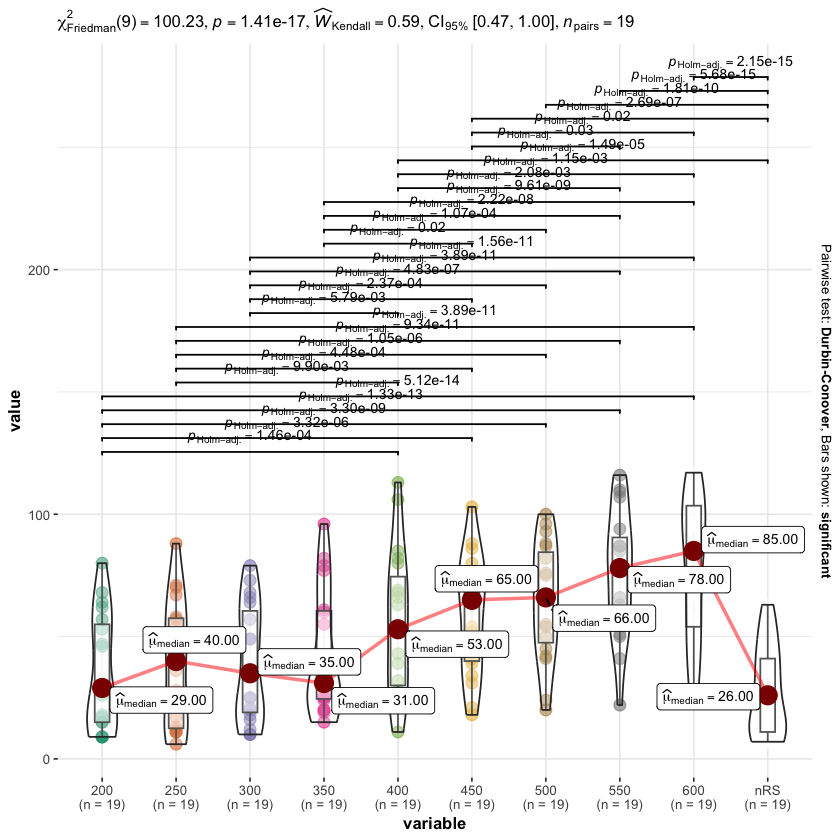

In [3]:
ggwithinstats(df, x = variable, y = value, type = "nonparametric")

,.y.,n,statistic,df,p,method
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>
Friedman chi-squared,value,19,100.2332,9,1.411596e-17,Friedman test


Number of labels is greater than default palette color count.
• Select another color `palette` (and/or `package`).


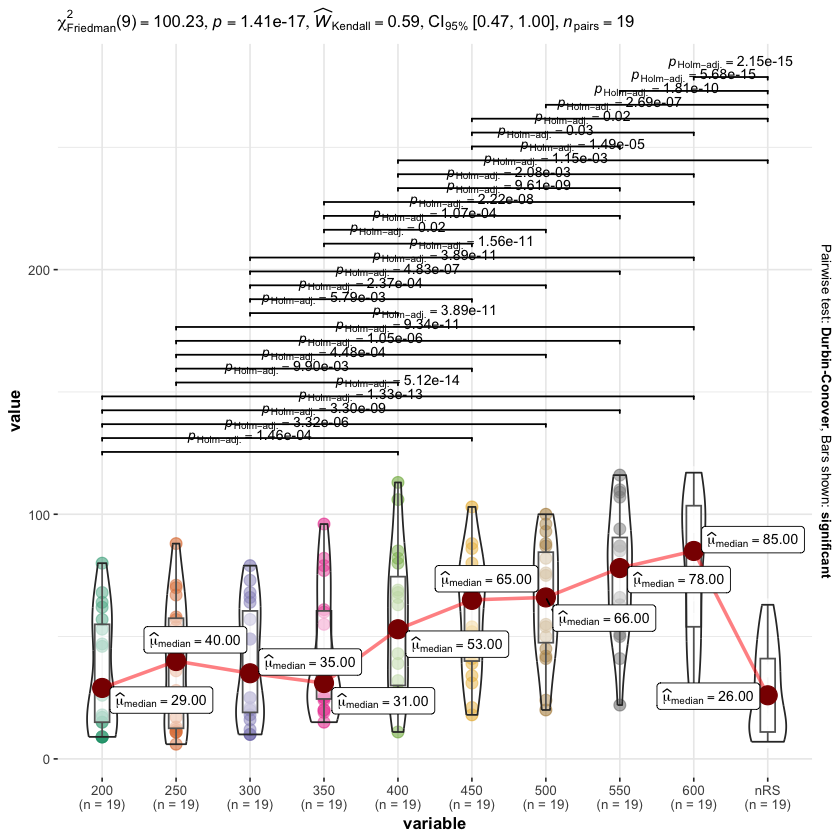

In [4]:
df %>% friedman_test(value ~ variable | pid)
ggwithinstats(df, x = variable, y = value, type = "nonparametric")

In [8]:
df <- read.csv("Data/main-questionnaire-melted.csv", sep = ";")

,.y.,n,statistic,df,p,method
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>
Friedman chi-squared,value,19,17.77918,9,0.03782355,Friedman test


Number of labels is greater than default palette color count.
• Select another color `palette` (and/or `package`).


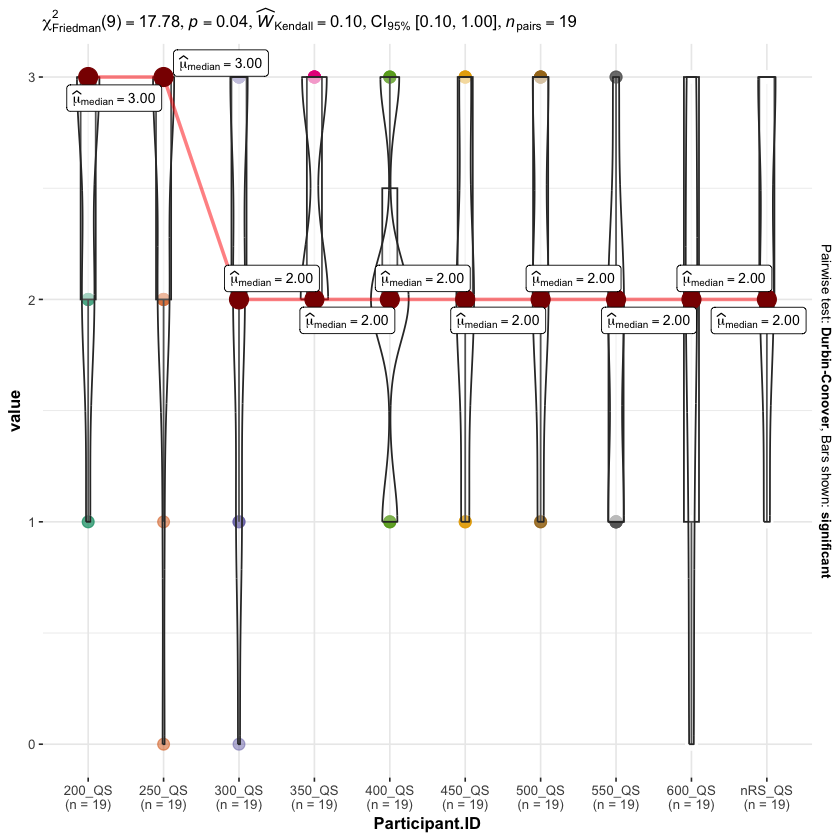

In [6]:
df %>% friedman_test(value ~ Participant.ID | pid)
ggwithinstats(df, x = Participant.ID, y = value, type = "nonparametric")